## **😀경제지표에 따른 서울시 교통량 예측하기😀**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/complete.csv",encoding="utf-8")
df.head()

,date,GDP,Economic growth rate,Regular Gasoline,Diesel for automobiles,population,Car registration,Min wage,Min wage increase rate,City bus trunk line,...,Texi,Model texi,Consumer price,Interest rate,Number of employed,Export amount,Export growth rate,Import amount,Import growth rate,Traffic rate
0,2015-01-01,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5400081.5
1,2015-01-02,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5220255.0
2,2015-01-03,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,4480084.5
3,2015-01-04,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5486275.0
4,2015-01-05,394273.0,2.4,1531.05,1351.25,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5831397.0


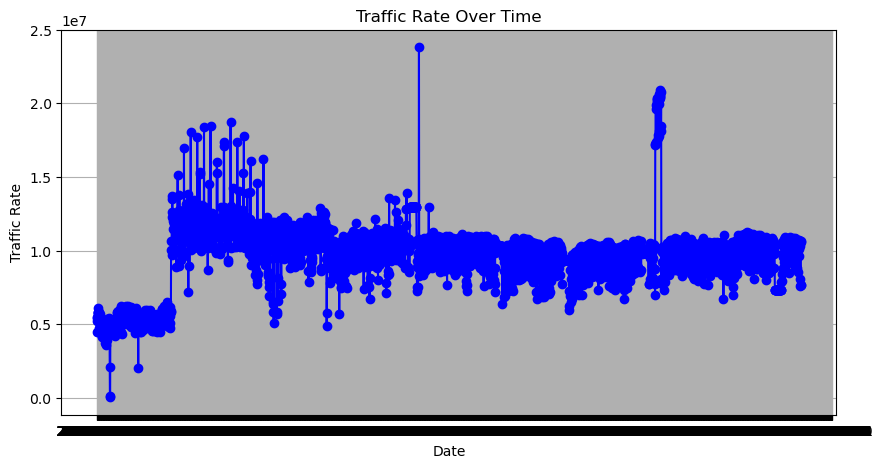

In [3]:
# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Traffic rate'], marker='o', linestyle='-', color='b')
plt.title('Traffic Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Rate')
plt.grid(True)
plt.show()
# 그래프 모양이 너무 이상해서 분석하기 쉽지 않다

In [4]:
# 2015년 데이터만 추출
df_2015 = df[df['date'].dt.year == 2017]

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df_2015['Date'], df_2015['Traffic rate'], marker='o', linestyle='-', color='b')
plt.title('2015년 Traffic Rate')
plt.xlabel('Date')
plt.ylabel('Traffic Rate')
plt.grid(True)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
# 2015년 1월 데이터만 추출
df_january_2015 = df[(df['Date'].dt.year == 2016) & (df['Date'].dt.month == 4)]

# Traffic rate에 로그 스케일 적용
df_january_2015['Log Traffic rate'] = np.log(df_january_2015['Traffic rate'])

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df_january_2015['Date'], df_january_2015['Traffic rate'], marker='o', linestyle='-', color='b')
plt.title('2015-1 Traffic Rate')
plt.xlabel('Date')
plt.ylabel('Traffic Rate')
plt.grid(True)
plt.show()

KeyError: 'Date'

In [6]:
# 그래프 확인하며 이상치 찾기
# 2015년 3월 3일.4일/ 7월 11일 12월->값이 이상치가 아니라 연말이 교통량이 증가하는 경향
# 2016년 

In [7]:
# GDP 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['GDP'], marker='o', linestyle='-', color='b')
plt.title('GDP and Date')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

KeyError: 'Date'

<Figure size 1000x500 with 0 Axes>

In [8]:
# 2015년 데이터만 추출
df_2015 = df[df['Date'].dt.year == 2017]

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df_2015['Date'], df_2015['GDP'], marker='o', linestyle='-', color='b')
plt.title('2015년 Traffic Rate')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

KeyError: 'Date'

In [9]:
df_cleaned = df.dropna(inplace=True)
df_cleaned

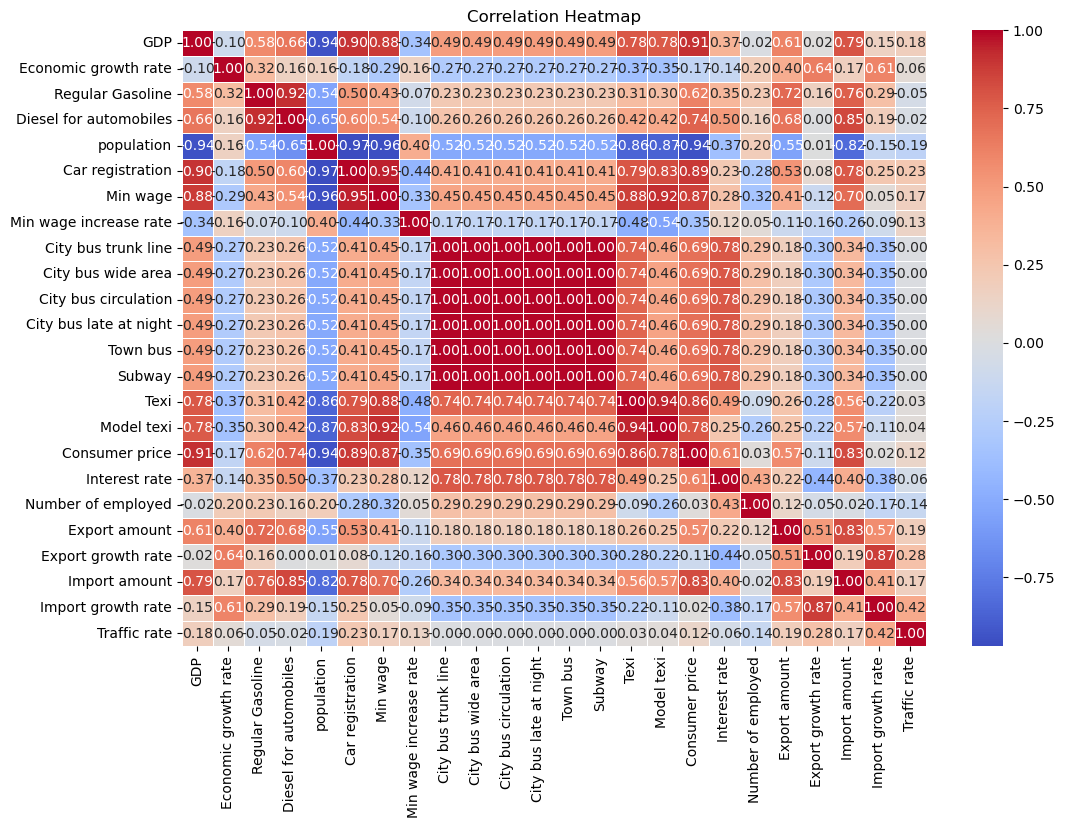

In [10]:
# 숫자 타입 자료들만 선택
df_cleaned = df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = df_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

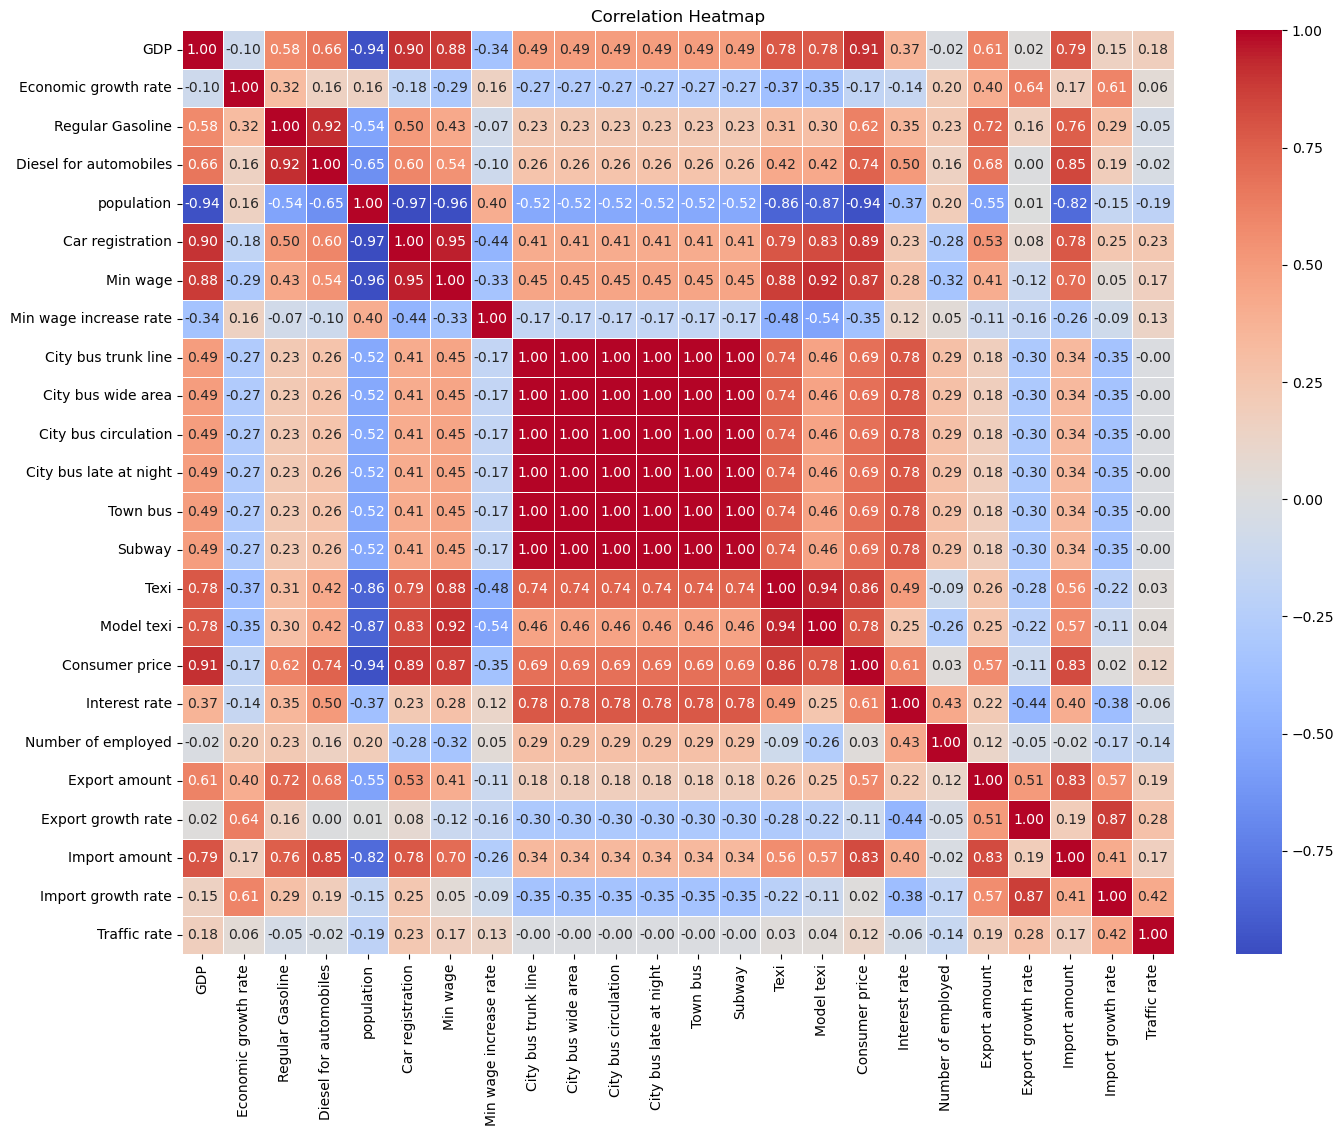

In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(scaled_data, index=df_cleaned.index, columns=df_cleaned.columns)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Scaling 전후 상관관계는 변하지 않음
# Car register, Export Growth rate, Import Growth rate 와 중간~약한 상관관계

In [19]:
# Filter the data to keep only entries before January 1, 2020
df_before_2020 = df[df['date'] < '2020-01-01']

# Drop any rows where 'date' is NaN
df_before_2020.dropna(subset=['date'], inplace=True)
df_before_2020

C:\Users\User\AppData\Local\Temp\ipykernel_11196\1592100311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2020.dropna(subset=['date'], inplace=True)


,date,GDP,Economic growth rate,Regular Gasoline,Diesel for automobiles,population,Car registration,Min wage,Min wage increase rate,City bus trunk line,...,Texi,Model texi,Consumer price,Interest rate,Number of employed,Export amount,Export growth rate,Import amount,Import growth rate,Traffic rate
0,2015-01-01,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.0200,516.65,45105389,-1.0,39283025,-12.2,5400081.5
1,2015-01-02,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.0200,516.65,45105389,-1.0,39283025,-12.2,5220255.0
2,2015-01-03,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.0200,516.65,45105389,-1.0,39283025,-12.2,4480084.5
3,2015-01-04,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.0200,516.65,45105389,-1.0,39283025,-12.2,5486275.0
4,2015-01-05,394273.0,2.4,1531.05,1351.25,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.0200,516.65,45105389,-1.0,39283025,-12.2,5831397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,499344.0,2.7,1558.67,1391.73,9729107,3124157.0,8350,10.9,1200,...,3800,6500,99.719,0.0125,511.73,45668341,-5.3,43687430,-0.8,8421444.0
1822,2019-12-28,499344.0,2.7,1558.67,1391.73,9729107,3124157.0,8350,10.9,1200,...,3800,6500,99.719,0.0125,511.73,45668341,-5.3,43687430,-0.8,10401067.0
1823,2019-12-29,499344.0,2.7,1558.67,1391.73,9729107,3124157.0,8350,10.9,1200,...,3800,6500,99.719,0.0125,511.73,45668341,-5.3,43687430,-0.8,10717087.5
1824,2019-12-30,499344.0,2.7,1565.09,1396.34,9729107,3124157.0,8350,10.9,1200,...,3800,6500,99.719,0.0125,511.73,45668341,-5.3,43687430,-0.8,10784414.5


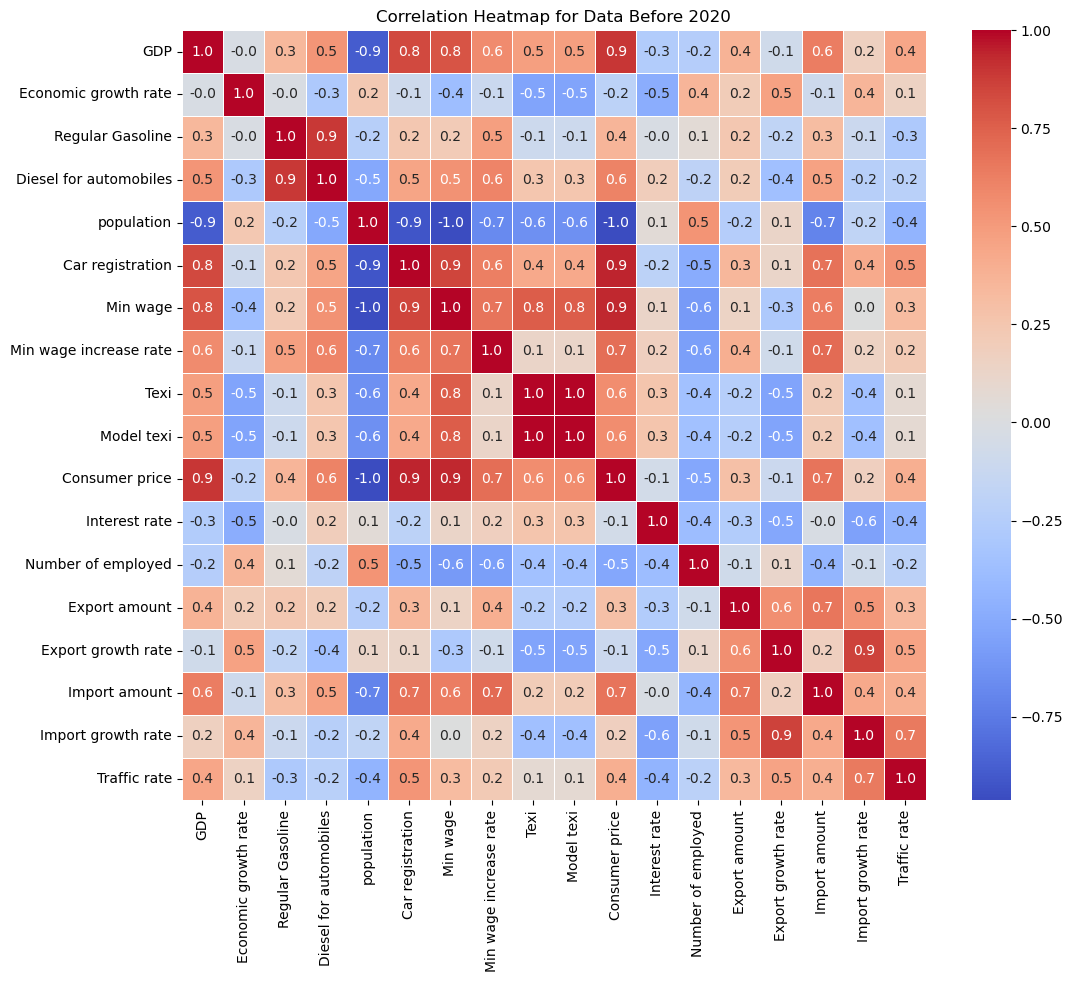

In [22]:
# Select only numeric columns for the correlation matrix, excluding specified columns
exclude_columns = [
    'City bus trunk line', 'City bus wide area', 'City bus circulation', 
    'City bus late at night', 'Town bus', 'Subway'
]
numeric_cols = df_before_2020.select_dtypes(include=[np.number]).drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap for Data Before 2020')
plt.show()

In [23]:
# 코로나 전후로 자르자 조금 더 유의미한 변수값이 나왔다
# GDP, Car register, Customer price, Export growth rate,
# Import amount 와 중간정도의 상관관계
# Import growth rate 에서 강한 상관관계를 보였다

In [24]:
# Save the filtered data to a new CSV file
df_before_2020.to_csv('../data/complete_b2020.csv', index=False)

In [25]:
# 코로나 전후(2020년 기준) 으로 나눠 분석하기로 결정

In [26]:
# Filter the data to keep only entries before January 1, 2020
df_after_2020 = df[df['date'] >= '2020-01-01']

# Drop any rows where 'date' is NaN
df_after_2020.dropna(subset=['date'], inplace=True)
df_after_2020

C:\Users\User\AppData\Local\Temp\ipykernel_11196\680698832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2020.dropna(subset=['date'], inplace=True)


,date,GDP,Economic growth rate,Regular Gasoline,Diesel for automobiles,population,Car registration,Min wage,Min wage increase rate,City bus trunk line,...,Texi,Model texi,Consumer price,Interest rate,Number of employed,Export amount,Export growth rate,Import amount,Import growth rate,Traffic rate
1826,2020-01-01,459774.0,1.4,1565.09,1396.34,9689159,3157361.0,8590,2.87,1200,...,3800,6500,100.09,0.0125,508.88,43103061,-6.6,42718100,-5.4,8025999.5
1827,2020-01-02,459774.0,1.4,1565.09,1396.34,9689159,3157361.0,8590,2.87,1200,...,3800,6500,100.09,0.0125,508.88,43103061,-6.6,42718100,-5.4,8804992.5
1828,2020-01-03,459774.0,1.4,1565.09,1396.34,9689159,3157361.0,8590,2.87,1200,...,3800,6500,100.09,0.0125,508.88,43103061,-6.6,42718100,-5.4,7714962.5
1829,2020-01-04,459774.0,1.4,1565.09,1396.34,9689159,3157361.0,8590,2.87,1200,...,3800,6500,100.09,0.0125,508.88,43103061,-6.6,42718100,-5.4,7198161.0
1830,2020-01-05,459774.0,1.4,1565.09,1396.34,9689159,3157361.0,8590,2.87,1200,...,3800,6500,100.09,0.0125,508.88,43103061,-6.6,42718100,-5.4,9811168.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,2023-11-06,580296.0,1.4,1686.08,1634.32,9390925,3191162.0,9620,5.00,1500,...,4800,7000,112.67,0.0350,522.99,55561090,7.3,51997805,-11.6,10591537.0
3232,2023-11-07,580296.0,1.4,1686.08,1634.32,9390925,3191162.0,9620,5.00,1500,...,4800,7000,112.67,0.0350,522.99,55561090,7.3,51997805,-11.6,10610666.0
3233,2023-11-08,580296.0,1.4,1686.08,1634.32,9390925,3191162.0,9620,5.00,1500,...,4800,7000,112.67,0.0350,522.99,55561090,7.3,51997805,-11.6,10654951.0
3234,2023-11-09,580296.0,1.4,1686.08,1634.32,9390925,3191162.0,9620,5.00,1500,...,4800,7000,112.67,0.0350,522.99,55561090,7.3,51997805,-11.6,7677503.0


In [27]:
# Save the filtered data to a new CSV file
df_after_2020.to_csv('../data/complete_a2020.csv', index=False)

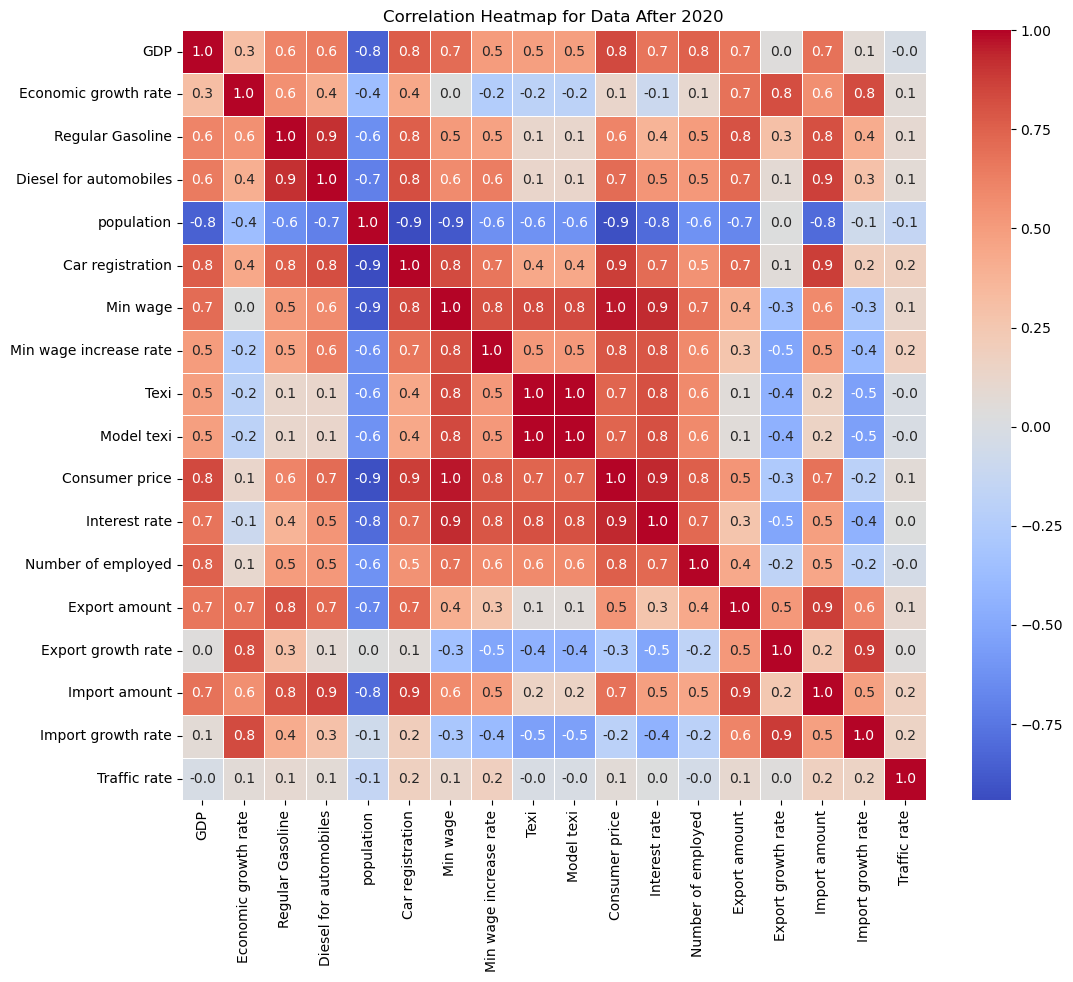

In [28]:
# Select only numeric columns for the correlation matrix, excluding specified columns
exclude_columns = [
    'City bus trunk line', 'City bus wide area', 'City bus circulation', 
    'City bus late at night', 'Town bus', 'Subway'
]
numeric_cols = df_after_2020.select_dtypes(include=[np.number]).drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap for Data After 2020')
plt.show()

In [30]:
# 2020년 이후 경제변수들은 교통량과는 유의미한 상관관계가 없다

#전체 연관관계 : Car register,Import growth rate, Export growth rate
#코로나 전 연관관계 : GDP, Car register, Customer price, ,Export growth ratem
#Import growth rate